# Ham & Spam SMS Classification


In [99]:
import pandas as pd
import numpy as np

## Load The Dataset

In [100]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [101]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [103]:
# Drop null columns
df.drop(columns=[	"Unnamed: 2"	,"Unnamed: 3"	,"Unnamed: 4"],inplace=True)

In [104]:
df.sample()

,v1,v2
4071,spam,Loans for any purpose even if you have Bad Cre...


In [105]:
# Rename the column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [106]:
df.sample()

,target,text
1373,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In..."


In [107]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [108]:
df['target'].isnull().sum()

0

In [109]:
df['text'].isnull().sum()

0

In [110]:
# Checking Dublicates
df.duplicated().sum()

403

In [111]:
# Removing dublicates
df=df.drop_duplicates(keep='first')

In [112]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [113]:
df.shape

(5169, 2)

## Label Encoding Of Target Column

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [115]:
df['target']=le.fit_transform(df['target'])

In [116]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 2.EDA (Exploratory Data analysis)

In [117]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

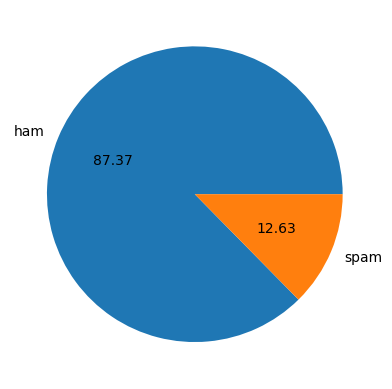

In [118]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

**Data is imbalanced**

In [119]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
#making the new column of "no of characters" of each text record
df['num_characters']=df['text'].apply(len)

In [121]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [122]:
# make a new column for "no of words" in each text record
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [123]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [124]:
# make a new column for "no of sentences" in each text record
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [125]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [126]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [127]:
# Checking Description for ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [128]:
# Checking Description for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [129]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

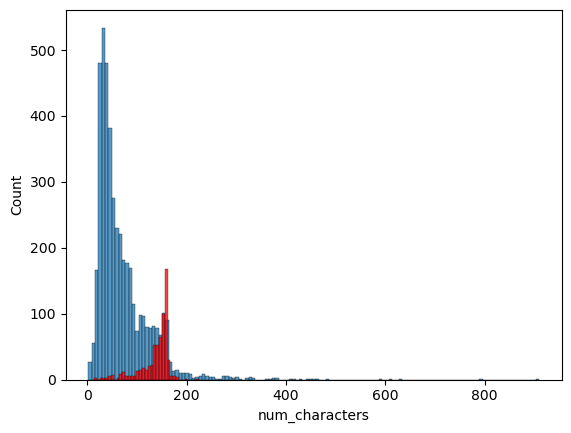

In [130]:
#Plotting histogram on ham and spam
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

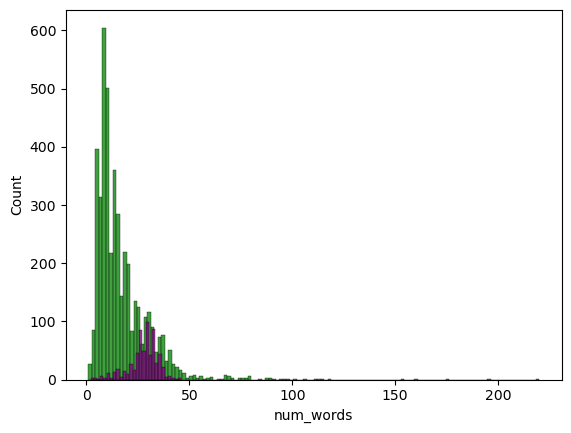

In [131]:
#Plotting histogram on ham and spam
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='purple')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

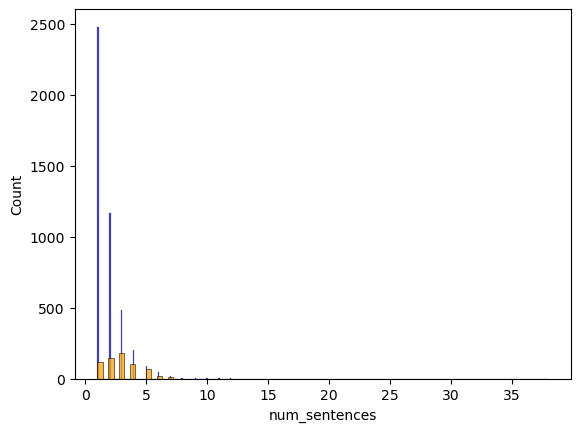

In [132]:
#Plotting histogram on ham and spam
sns.histplot(df[df['target']==0]['num_sentences'],color='blue')
sns.histplot(df[df['target']==1]['num_sentences'],color='orange')

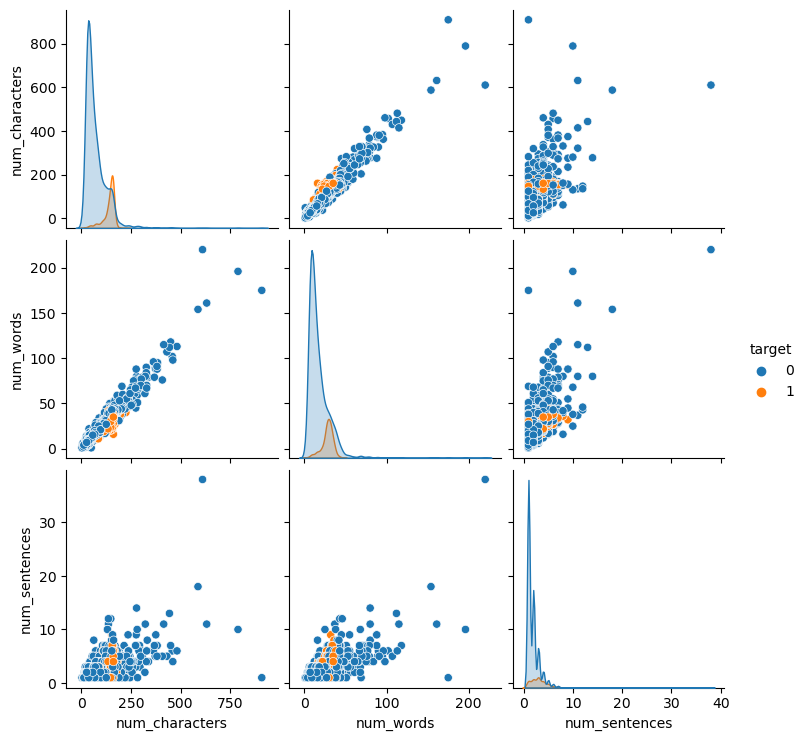

In [133]:
# relationships
sns.pairplot(df,hue='target')

In [134]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<AxesSubplot:>

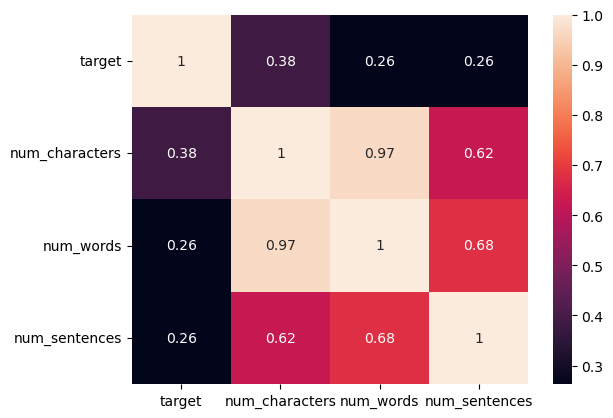

In [135]:
#Plot Heatmap
sns.heatmap(df.corr() ,annot=True)

## 3.Data Preprocessing 

1. Lower Casing
2. Removing Stopwords & Punctuation
3. Removing Special Characters
4. Tokenization
5. Stemming

In [136]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [137]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [138]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('running')

'run'

In [139]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    
    return " ".join(y)

In [140]:
transform_text('Hi! how are you? , I love the yt lectures on machine learning')

'hi love yt lectur machin learn'

In [141]:
df['transformed_text']=df['text'].apply(transform_text)

In [142]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [143]:
# Making Wordcloud for words
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='black')

In [144]:
#for ham
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

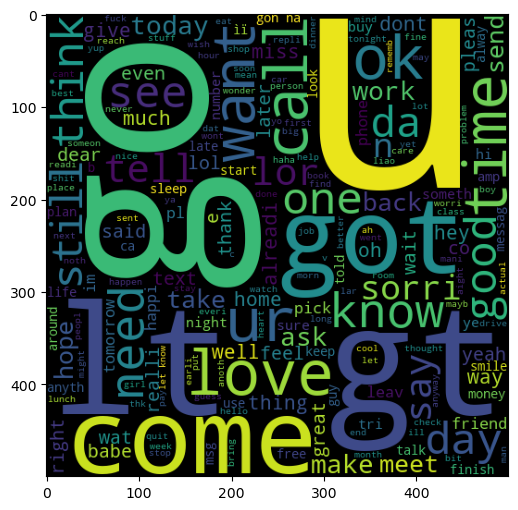

In [145]:
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

In [146]:
#for spam
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

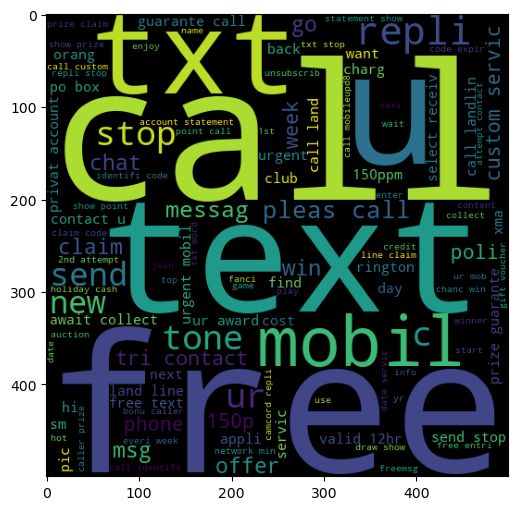

In [147]:
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)

## 4. Modeling Building

#### a. Vectorization 

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf=TfidfVectorizer(max_features=3000)   #model improvement-->max_features=3000
cv=CountVectorizer()

In [173]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [174]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [175]:
x.shape

(5169, 3000)

In [176]:
y=df['target'].values

In [177]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [178]:
y.shape

(5169,)

#### b. Train & Test Seperation

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

#### c. Modeling With NaiveBayes Algorithms

In [181]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [182]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

##### 1. Gaussian NB Results

In [183]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


##### 2. Multnomial NB Results

In [184]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


##### 3. Bernoulli NB Results

In [185]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Choosed TFIDF With Multinomial NB

#### d. Comparison of Multiple Models

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [187]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc=XGBClassifier(n_estimators=50,random_state=2)

In [188]:
classifiers={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBost':abc,
    'BC':bc,
    'ETC':etc,
    'GB':gbc,
    'XGB':xgbc
    
}

In [189]:
def train_classifier(classifiers,x_train, y_train, x_test, y_test):
    classifiers.fit(x_train,y_train)
    y_pred=classifiers.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [190]:
train_classifier(svc,x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [191]:
accuracy_scores=[]
precision_scores=[]

for name, clf in classifiers.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print('Name ',name)
    print('Accuracy ',current_accuracy)
    print('Precision ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Name  SVC
Accuracy  0.9758220502901354
Precision  0.9747899159663865


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Name  KN
Accuracy  0.9052224371373307
Precision  1.0
Name  NB
Accuracy  0.9709864603481625
Precision  1.0
Name  DT
Accuracy  0.9274661508704062
Precision  0.8118811881188119
Name  LR
Accuracy  0.9584139264990329
Precision  0.9702970297029703
Name  RF
Accuracy  0.9758220502901354
Precision  0.9829059829059829
Name  AdaBost
Accuracy  0.960348162475822
Precision  0.9292035398230089
Name  BC
Accuracy  0.9584139264990329
Precision  0.8682170542635659
Name  ETC
Accuracy  0.9748549323017408
Precision  0.9745762711864406
Name  GB
Accuracy  0.9468085106382979
Precision  0.9191919191919192
Name  XGB
Accuracy  0.9671179883945842
Precision  0.9262295081967213


In [168]:
performance_df=pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [169]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.937137,0.854369
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,AdaBost,0.961315,0.945455
7,BC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GB,0.952611,0.923810


In [170]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.937137
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.971954
6,AdaBost,Accuracy,0.961315
7,BC,Accuracy,0.958414
8,ETC,Accuracy,0.972921
9,GB,Accuracy,0.952611


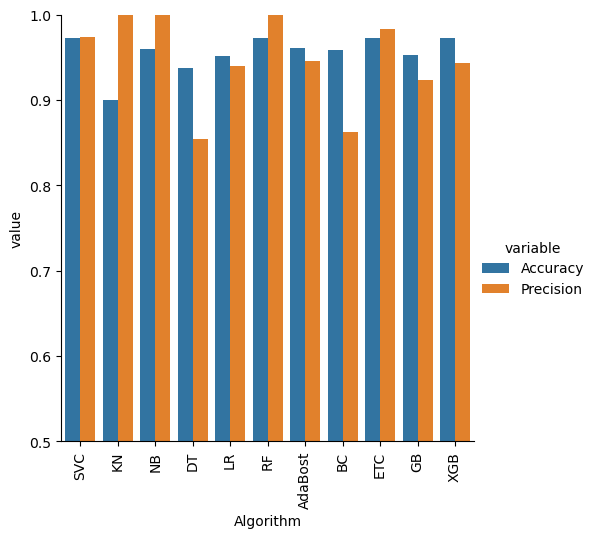

In [171]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

#### e. Model Improvement

Results with tfidf max_features=3000

In [192]:
temp_df=pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_max_features_3000':accuracy_scores,'Precision_max_features_3000':precision_scores})

In [193]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_features_3000,Precision_max_features_3000
0,SVC,0.972921,0.974138,0.975822,0.974790
1,KN,0.900387,1.000000,0.905222,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000
3,DT,0.937137,0.854369,0.927466,0.811881
4,LR,0.951644,0.940000,0.958414,0.970297
5,RF,0.971954,1.000000,0.975822,0.982906
6,AdaBost,0.961315,0.945455,0.960348,0.929204
7,BC,0.958414,0.862595,0.958414,0.868217
8,ETC,0.972921,0.982456,0.974855,0.974576
9,GB,0.952611,0.923810,0.946809,0.919192


## 5. Saving The Model

Taking Multinomial NB For Modeling Because of their High precision and accuracy

In [194]:
import pickle

In [195]:
pickle.dump(tfidf,open('vectorizor.pkl','wb'))  #save tfidf vectorizor
pickle.dump(mnb,open('spam_model.pkl','wb'))    #saving Multinomial NB Model